<a href="https://colab.research.google.com/github/vothiutdu/CoderSchool_project/blob/main/Ecommerce_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect to Google Drive

In [ ]:
# #create connection to google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
import gdown
id = '1AKpZWiTY9L3KFGNDYe0BJsUVPL3g2dTy'
url = 'http://drive.google.com/u/1/uc?id={}&export=download'.format(id)
gdown.download(url, './Olist_Ecommerce.zip', quiet=False)

Downloading...
From: http://drive.google.com/u/1/uc?id=1AKpZWiTY9L3KFGNDYe0BJsUVPL3g2dTy&export=download
To: /content/Olist_Ecommerce.zip
100%|██████████| 44.4M/44.4M [00:00<00:00, 210MB/s]


'./Olist_Ecommerce.zip'

In [ ]:
!unzip /content/Olist_Ecommerce.zip

Archive:  /content/Olist_Ecommerce.zip
replace product_category_name_translation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace product_category_name_translation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: product_category_name_translation.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_customers_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_geolocation_dataset.csv  


In [ ]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

#Import Libraries and datasets

In [ ]:
#import data from drive
# raw_path = '/content/gdrive/MyDrive/DS_FINAL/Olist/'
olist_location = pd.read_csv('olist_geolocation_dataset.csv')
olist_customers = pd.read_csv('olist_customers_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
product_name_translator = pd.read_csv('product_category_name_translation.csv')

In [ ]:
#Convert from scientific style (e+04) to 2 decimal float format 
pd.options.display.float_format = "{:.2f}".format

# Data Cleaning

**Replace the product category name to english using product_name_translator**

In [ ]:
olist_products = olist_products.merge(product_name_translator, on="product_category_name", how="left")
olist_products.drop ('product_category_name', axis=1, inplace=True)
olist_products.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

**Merge all the tables in one dataframe**

In [ ]:

olist = olist_orders.merge(olist_order_items, on='order_id', how='left')
olist = olist.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
olist = olist.merge(olist_order_reviews, on='order_id', how='outer')
olist = olist.merge(olist_products, on='product_id', how='outer')
olist = olist.merge(olist_customers, on='customer_id', how='outer')
olist = olist.merge(olist_sellers, on='seller_id', how='outer')

**Handling null values in dataset**

In [ ]:
#calculate percentage for null values
percent_missing = olist.isnull().sum() * 100 / len(olist)
missing_value_df = pd.DataFrame({'column_name': olist.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
order_id,order_id,0.00
customer_id,customer_id,0.00
order_status,order_status,0.00
order_purchase_timestamp,order_purchase_timestamp,0.00
order_approved_at,order_approved_at,0.15
order_delivered_carrier_date,order_delivered_carrier_date,1.75
order_delivered_customer_date,order_delivered_customer_date,2.87
order_estimated_delivery_date,order_estimated_delivery_date,0.00
order_item_id,order_item_id,0.70
product_id,product_id,0.70


In [ ]:
olist.review_comment_title.fillna('No Title', inplace=True)
olist.review_comment_message.fillna('No Message', inplace=True)
olist.product_photos_qty.fillna(0, inplace=True)
olist = olist[olist['order_item_id'].notna()]

In [ ]:
#reset index after handling null values
olist = olist.reset_index().drop(columns='index')

In [ ]:
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,...,8.00,13.00,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,...,8.00,13.00,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.00,87285b34884572647811a353c7ac498a,...,8.00,13.00,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.00,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.00,87285b34884572647811a353c7ac498a,...,8.00,13.00,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350.00,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.00,87285b34884572647811a353c7ac498a,...,8.00,13.00,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350.00,maua,SP


**Check for dupplicate values** 

In [ ]:
olist[olist.order_id == 'd543201a9b42a1402ff97e65b439a48b']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
64,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,1.00,595fac2a385ac33a80bd5114aec74eb8,...,13.00,19.00,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,31570.00,belo horizonte,SP
65,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,2.00,595fac2a385ac33a80bd5114aec74eb8,...,13.00,19.00,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,31570.00,belo horizonte,SP


**We shall be dropping those observations which have the same Order ID, Customer ID, purchase timestamp and review from the dataset. This is because a customer cannot post the same review multiple times for the same product at the same instant of time.**

In [ ]:
olist.drop_duplicates(subset=['order_id', 'customer_id', 'order_purchase_timestamp'],inplace=True)

In [ ]:
olist[olist.order_id == 'd543201a9b42a1402ff97e65b439a48b']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
64,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,1.00,595fac2a385ac33a80bd5114aec74eb8,...,13.00,19.00,perfumery,958ac7760e5484df1496ba5833ab6117,89117,gaspar,SC,31570.00,belo horizonte,SP


In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   customer_id                    98666 non-null  object 
 2   order_status                   98666 non-null  object 
 3   order_purchase_timestamp       98666 non-null  object 
 4   order_approved_at              98652 non-null  object 
 5   order_delivered_carrier_date   97657 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  98666 non-null  object 
 8   order_item_id                  98666 non-null  float64
 9   product_id                     98666 non-null  object 
 10  seller_id                      98666 non-null  object 
 11  shipping_limit_date            98666 non-null  object 
 12  price                          98666 non-null

**Correct datetime value types**

In [ ]:
columns_timestamp = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                     'shipping_limit_date', 'review_creation_date']

for column in columns_timestamp:
    olist[column] = pd.to_datetime(olist[column])

**Create new column month and year for order_purchase_timestamp**

In [ ]:
olist['year'] = olist['order_purchase_timestamp'].dt.year
olist['month'] = olist['order_purchase_timestamp'].dt.month

**HELPER FUNCTIONS**

In [ ]:
def single_countplot(df, ax, x=None, y=None,  order=True,  palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    ncount = len(df)
    if x:
        col = x
    else:
        col = y
    if order:
        sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
    else:
        sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

**How had data distributed from 2016 to 2018**

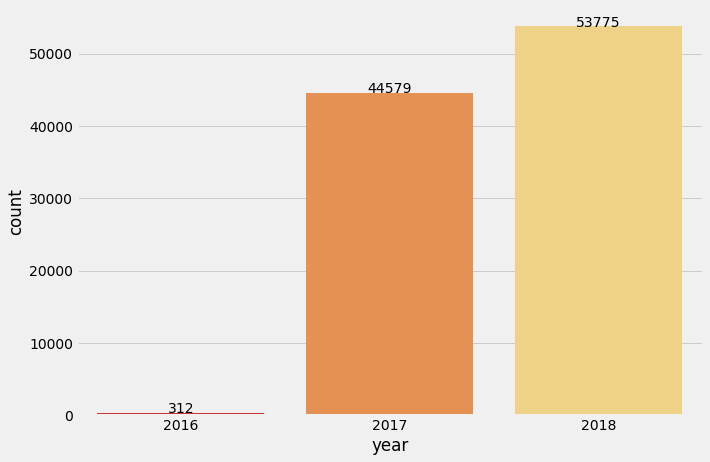

In [ ]:
plt.figure(figsize=(10,7))
result = sns.countplot(x='year', data=olist, palette="YlOrRd_r")
show_values_on_bars(result)
plt.show()

**Most of the data is from 2017 and 2018. So we will drop data from 2016 to avoid any bias insights**

In [ ]:
olist = olist[olist.year != 2016]

#Data Analyzing

##Product Analysis

###Step 1: Find Trending Product in Brazil from 2017 to 2018

In [ ]:
result = olist.groupby(['product_category_name', 'year']).agg(Total=('order_item_id', 'sum')).reset_index()
df1 = result.pivot_table(index=['product_category_name'], 
                    columns='year', 
                    values='Total'
                    )
df1.reset_index(inplace=True)
df1.fillna(0, inplace=True)

df1['2017-2018'] = df1[2018] - df1[2017]
top_5_trending_product = df1.sort_values(by='2017-2018', ascending=False).head()
top_5_trending_product = top_5_trending_product.loc[:, top_5_trending_product.columns != '2017-2018']
top_5_trending_product = pd.melt(top_5_trending_product, id_vars=['product_category_name'])  
####################################################################################
top_5_worst_trending_product = df1.sort_values(by='2017-2018', ascending=True).head()
top_5_worst_trending_product = top_5_worst_trending_product.loc[:, top_5_worst_trending_product.columns != '2017-2018']
top_5_worst_trending_product = pd.melt(top_5_worst_trending_product, id_vars=['product_category_name'])  



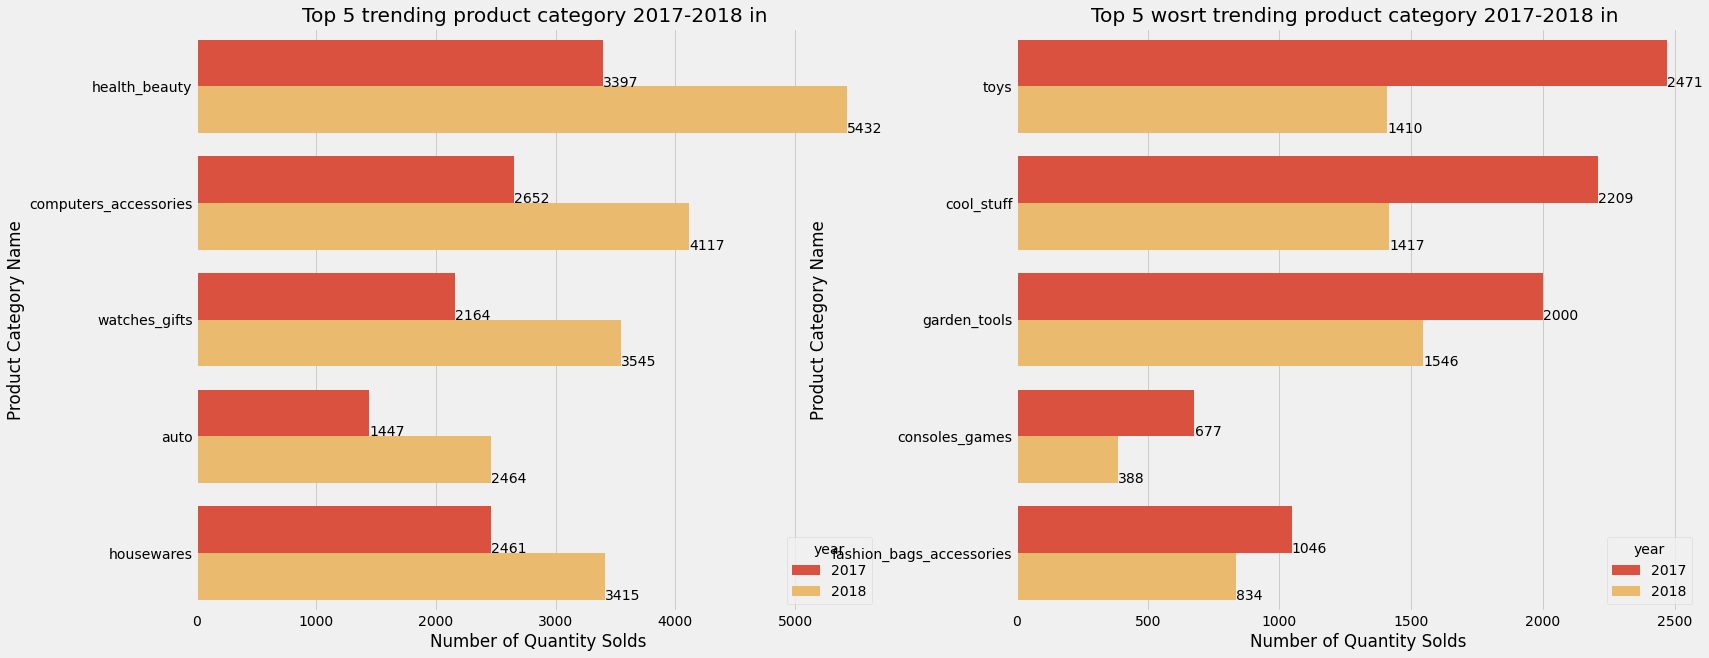

<Figure size 1080x720 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
axe = axes.flatten()
plt.figure(figsize=(15,10))
result1 = sns.barplot(y='product_category_name', hue='year', x='value', ax=axe[0], data=top_5_trending_product, palette='YlOrRd_r', orient='h')
result1.set(title='Top 5 trending product category 2017-2018 in ')
result1.set_xlabel("Number of Quantity Solds")
result1.set_ylabel("Product Category Name")
show_values_on_bars(result1, h_v='h')
######################################
result2 = sns.barplot(y='product_category_name', hue='year', x='value', ax=axe[1], data=top_5_worst_trending_product, palette='YlOrRd_r', orient='h')
result2.set(title='Top 5 wosrt trending product category 2017-2018 in ')
result2.set_xlabel("Number of Quantity Solds")
result2.set_ylabel("Product Category Name")
show_values_on_bars(result2, h_v='h')
plt.tight_layout()

In [ ]:
#create new dataset contains top 5 trending product
olist_1 = olist[olist.product_category_name.isin(top_5_trending_product.product_category_name.unique())]

###Step 2: find top 5 states in which customers's favorite product are in top 5 trending product 

In [ ]:
t_state_avg_price = olist_1.groupby('customer_state')['payment_value'].mean().reset_index().sort_values('payment_value', ascending=False)
t_state_sum_price = olist_1.groupby('customer_state')['payment_value'].sum().reset_index().sort_values('payment_value', ascending=False)
t_state_no_customer = olist_1.groupby('customer_state')['customer_id'].count().reset_index().sort_values('customer_id', ascending=False)

In [ ]:
t_state_avg_price.sort_values(by='payment_value', ascending=False, inplace=True)
sorter = list(t_state_avg_price['customer_state'].values)
sorter_idx = dict(zip(sorter, range(len(sorter))))

t_state_sum_price['mean_rank'] = t_state_avg_price['customer_state'].map(sorter_idx)
t_state_sum_price.sort_values(by='mean_rank', inplace=True)
t_state_sum_price.drop('mean_rank', axis=1, inplace=True)

t_state_no_customer['mean_rank'] = t_state_avg_price['customer_state'].map(sorter_idx)
t_state_no_customer.sort_values(by='mean_rank', inplace=True)
t_state_no_customer.drop('mean_rank', axis=1, inplace=True)

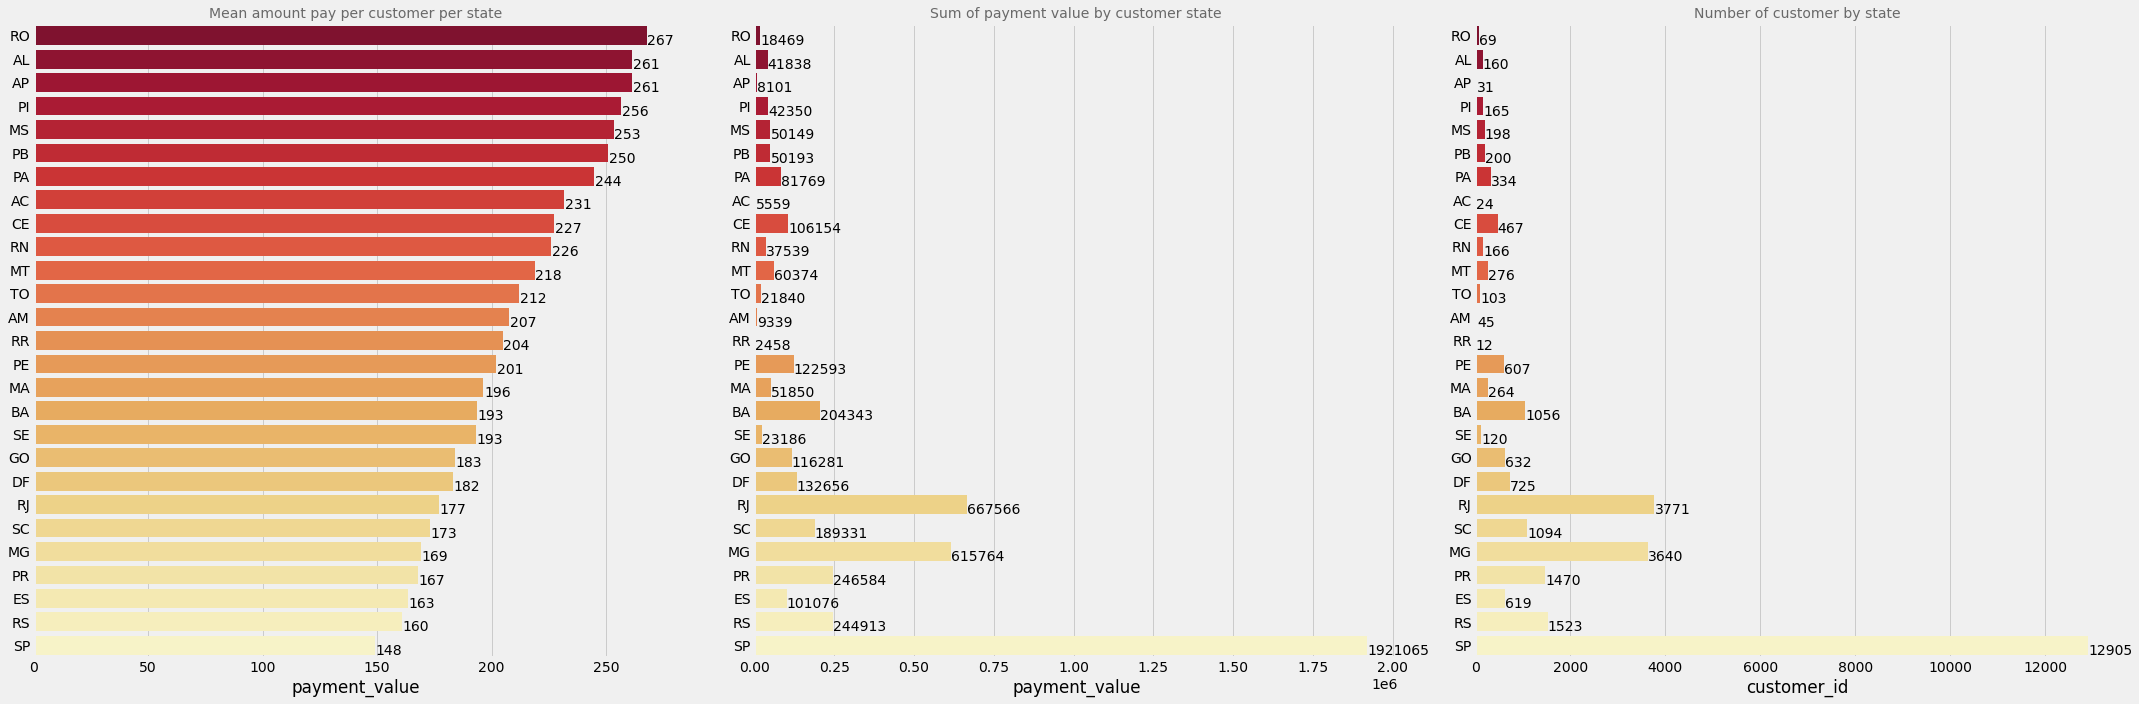

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(30,10))
plot_avg = sns.barplot(y='customer_state', x='payment_value', data=t_state_avg_price, ax=axs[0], palette="YlOrRd_r")
show_values_on_bars(plot_avg, "h", 0.3)
plot_sum = sns.barplot(y='customer_state', x='payment_value', data=t_state_sum_price, ax=axs[1], palette="YlOrRd_r")
show_values_on_bars(plot_sum, "h", 0.3)
plot_total = sns.barplot(y='customer_state', x='customer_id', data=t_state_no_customer, ax=axs[2], palette="YlOrRd_r")
show_values_on_bars(plot_total, "h", 0.3)
for ax in axs:
    ax.set_ylabel('')
axs[0].set_title(f'Mean amount pay per customer per state', size=14, color='dimgrey')
axs[1].set_title(f'Sum of payment value by customer state', size=14, color='dimgrey')
axs[2].set_title(f'Number of customer by state', size=14, color='dimgrey')
plt.tight_layout()
plt.show()

In [ ]:
#Create new dataset which customer states are in top 4 states (SP, PR, MG, RJ)
olist_1 = olist_1[olist_1.customer_state.isin(['SP', 'RJ', 'MG', 'RS'])]

###Step 3: Let see how these trending products had change from 2017 to 2018 in each of these states

In [ ]:
result = olist_1.groupby(['customer_state', 'product_category_name', 'year']).agg(Total=('order_item_id', 'sum')).reset_index()

In [ ]:
#Create tables show changes in number of item solds between product category from  2017-2018
df2 = result.pivot_table(index=['customer_state','product_category_name'], 
                    columns='year', 
                    values='Total'
                    )
df2.reset_index(inplace=True)
df2.fillna(0, inplace=True)

df2['2017-2018'] = df2[2018] - df2[2017]

In [ ]:
df2

year,customer_state,product_category_name,2017,2018,2017-2018
0,MG,auto,174.00,302.00,128.00
1,MG,computers_accessories,327.00,558.00,231.00
2,MG,health_beauty,407.00,596.00,189.00
3,MG,housewares,298.00,406.00,108.00
4,MG,watches_gifts,213.00,402.00,189.00
5,RJ,auto,165.00,251.00,86.00
6,RJ,computers_accessories,355.00,513.00,158.00
7,RJ,health_beauty,400.00,570.00,170.00
8,RJ,housewares,320.00,424.00,104.00
9,RJ,watches_gifts,320.00,511.00,191.00


In [ ]:
top_trending_p_category_2017_2018 = df2.groupby(['customer_state']).apply(lambda x: x.nlargest(5, '2017-2018')).reset_index(drop=True)
top_trending_p_category_2017_2018 = top_trending_p_category_2017_2018.loc[:,top_trending_p_category_2017_2018.columns != '2017-2018']
top_trending_p_category_2017_2018 = pd.melt(top_trending_p_category_2017_2018, id_vars=['customer_state', 'product_category_name'])         

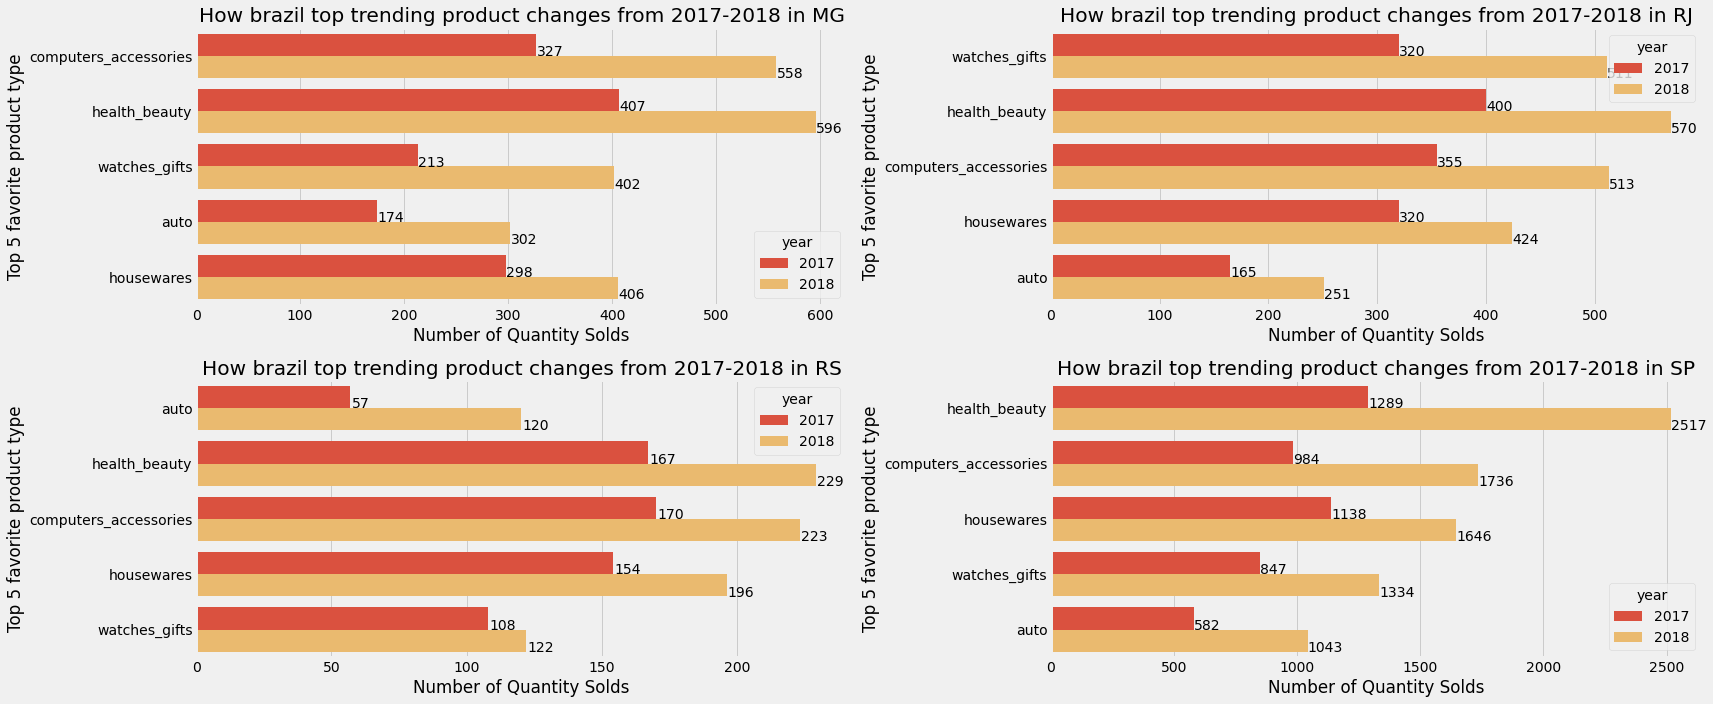

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(24, 10))
axe = axes.flatten()
for i, state in enumerate(top_trending_p_category_2017_2018.customer_state.unique()):
  data = top_trending_p_category_2017_2018[top_trending_p_category_2017_2018['customer_state'] == state]
  result = sns.barplot(y='product_category_name', hue='year', x='value', data=data, ax=axe[i], palette='YlOrRd_r', orient='h')
  result.set(title='How brazil top trending product changes from 2017-2018 in ' + state)
  result.set_xlabel("Number of Quantity Solds")
  result.set_ylabel("Top 5 favorite product type")
  show_values_on_bars(result, h_v='h')
plt.tight_layout()

##Customer Analysis 

In [ ]:
olist_1 = olist_1[olist_1.order_status == 'delivered']
olist_1 = olist_1[olist_1.order_delivered_carrier_date.notna()]
olist_1 = olist_1[olist_1.order_delivered_customer_date.notna()]
olist_1 = olist_1[olist_1.order_estimated_delivery_date.notna()]

In [ ]:
#create new column order purchase hour
olist_1['order_purchase_hour'] = olist_1['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
#create new column order purchase time day based on each time range
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
olist_1['order_purchase_time_day'] = pd.cut(olist_1['order_purchase_hour'], hours_bins, labels=hours_labels)

In [ ]:
#create new columns for further research
olist_1['order_purchase_dayofweek'] = olist_1['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
olist_1['order_purchase_dayofweek_name'] = olist_1['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
olist_1['order_purchase_month_name'] = olist_1['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
olist_1['order_purchase_year_month'] = olist_1['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
olist_1['order_purchase_date'] = olist_1['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [ ]:
#Calculate total Payment each month
y_month_total_payment = olist_1.groupby('order_purchase_year_month')['payment_value'].sum().reset_index()

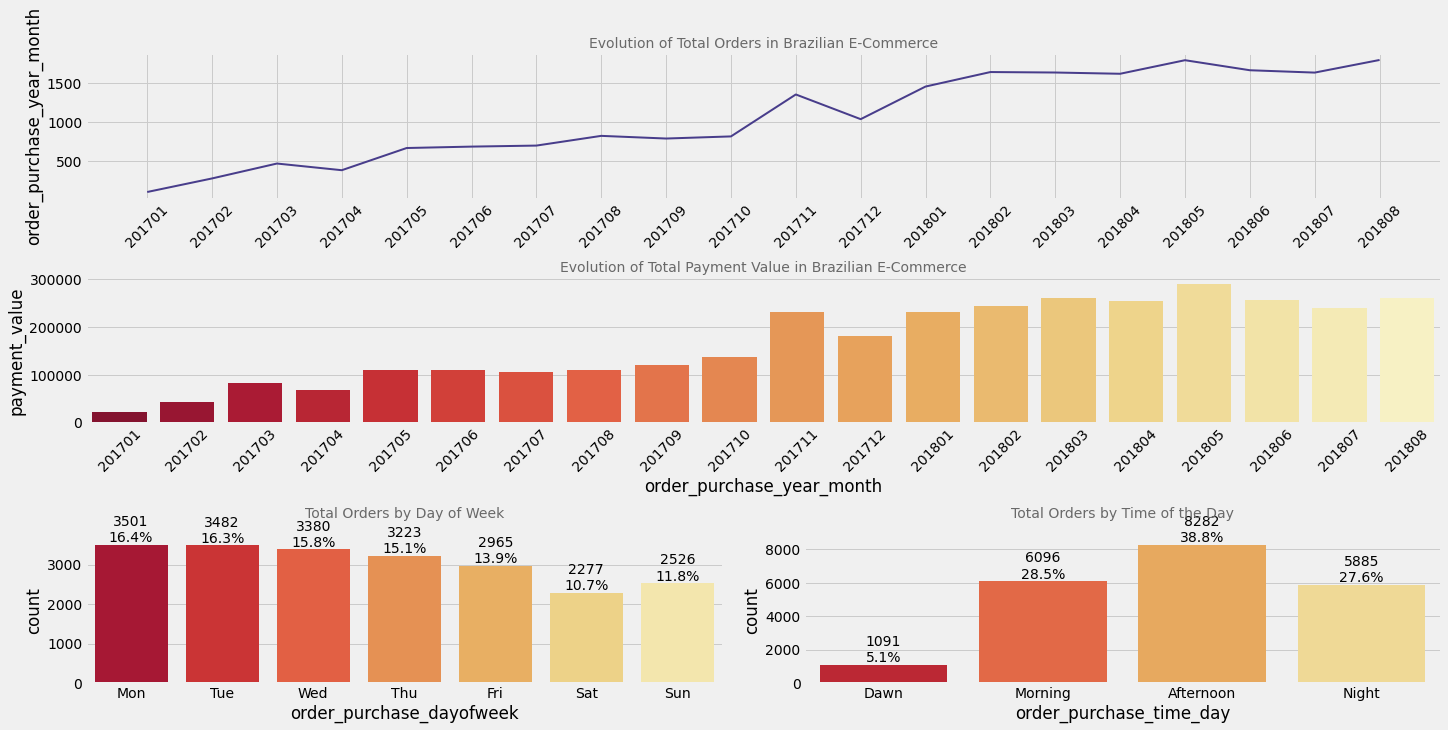

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
# Axis definition
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax4 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
sns.lineplot(data=olist_1['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2, palette='YlOrRd_r')
sns.barplot(data=y_month_total_payment, x='order_purchase_year_month', y='payment_value', ax=ax4, palette='YlOrRd_r')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
ax4.set_title('Evolution of Total Payment Value in Brazilian E-Commerce', size=14, color='dimgrey')

single_countplot(olist_1, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlOrRd_r')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

single_countplot(olist_1, x='order_purchase_time_day', ax=ax3, order=False, palette='YlOrRd_r')
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

# plt.tight_layout()
plt.show()

In [ ]:
#Sort heatmap by day in week
day_hour = olist_1.groupby(['order_purchase_dayofweek_name', 'order_purchase_hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()
c_s = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Sun']
# Change ColumnDtype
day_hour['order_purchase_dayofweek_name'] = pd.Categorical(day_hour['order_purchase_dayofweek_name'],
                                    categories=c_s,
                                    ordered=True)
day_hour=day_hour.pivot('order_purchase_dayofweek_name','order_purchase_hour','freq').sort_values('order_purchase_dayofweek_name')

Text(0.5, 1.0, 'Heatmap of tranactions over the hour by day')

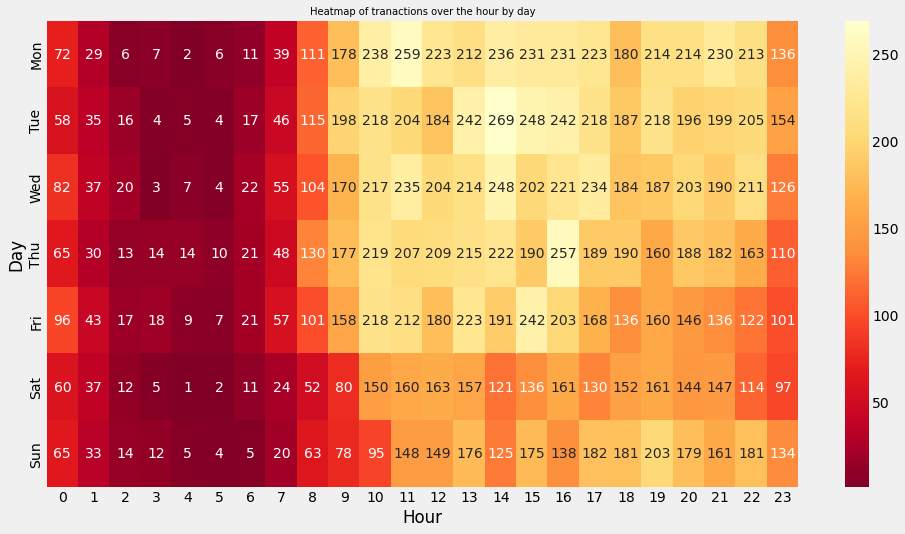

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="YlOrRd_r")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of tranactions over the hour by day",size=10)

##Review Analysis

### **Clean**

In [ ]:
df_comments = olist_order_reviews[['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])
df_comments = df_comments.reset_index(drop=True)
df_comments.columns = ['score', 'comment']
df_comments.head()

,score,comment
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."


In [ ]:
import re
# Stemming -> cắt cứng nhắc 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
porter.stem("changing")
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('portuguese')


def clean_text(x):
    # Remove break
    clean = re.sub('[\n\r]', '', x)
    # Remove hyperlink
    clean = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x)
    # Remove money
    clean = re.sub('[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+', '', x)
    # Remove numbers
    clean = re.sub('[0-9]+','', x)
    # Negotiation
    clean = re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )', 'negação ', x)
    # Remove non-alphabetic 
    clean = re.sub("[^a-zA-Z ]", " ", x).lower()
    # Stem and remove stopwords
    clean = [porter.stem(word) for word in clean.split() if word not in stops]
    return ' '.join(clean)

df_comments['clean'] = df_comments['comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_comments[df_comments['score']<3]['clean']

5        gostaria saber sempr recebi compra agora decpcion
6                                                  p ssimo
11                              n gostei comprei gato lebr
12       sempr compro internet entrega ocorr ant prazo ...
17                                      nada chegar pedido
                               ...                        
40954    recebi seguint email preciso saber recuperar d...
40960    boa tard n recebo todo produto falta bebe conf...
40969    foto diferent principalment graninha sint tica...
40971    problema entrega correio coloc site entregu di...
40976    produto chegou ja devolv poi est defeito n seg...
Name: clean, Length: 10890, dtype: object

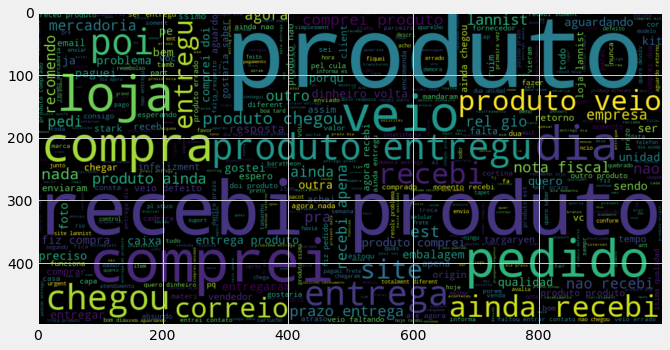

In [ ]:
# CODE SNIPPET TO CREATE A WORD CLOUD
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(df_comments[df_comments['score']<3]['clean'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

### **LDA**

In [ ]:
# !pip install googletrans==3.1.0a0
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_comments[df_comments['score']<3]['clean'].values.tolist() #Filter out the comment of bad rating
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['gostaria', 'saber', 'sempr', 'recebi', 'compra', 'agora', 'decpcion'], ['ssimo'], ['gostei', 'comprei', 'gato', 'lebr'], ['sempr', 'compro', 'internet', 'entrega', 'ocorr', 'ant', 'prazo', 'combinado', 'acredito', 'ser', 'prazo', 'ximo', 'stark', 'prazo', 'ximo', 'esgot', 'ainda', 'recebi', 'produto'], ['nada', 'chegar', 'pedido'], ['recebi', 'soment', 'control', 'midea', 'split', 'estilo', 'faltou', 'control', 'remoto', 'ar', 'condicionado', 'consul'], ['produto', 'chegou', 'prazo', 'estipulado', 'causou', 'transtorno', 'pq', 'programei', 'viagem', 'ria', 'filho', 'baseado', 'prazo', 'moro', 'bahia', 'cuiab', 'sozinho', 'agora', 'casa', 'est', 'vazia'], ['produto', 'inferior', 'mal', 'acabado'], ['pedi', 'reembolso', 'resposta', 'at', 'momento'], ['pedido', 'bald', 'pe', 'bloco', 'montar', 'un', 'cada', 'entregu', 'vendido', 'entregu', 'targaryen', 'tapet', 'eva', 

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
!pip install pyLDAvis
!pip install googletrans==3.1.0a0
import pyLDAvis
import pyLDAvis.gensim_models
from googletrans import Translator
translator = Translator()

     |████████████████████████████████| 1.7 MB 14.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c7cc6535e59070725a22c22265cb5207f99aad15cf693626f7b2116b751e21ac
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 1.3 MB 35.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=14c65259d3e06a23ee216c1f9847a1643a4a8d15e519c94b82c7081c590a7446
  Stored in directory: /root/.cache

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
9      0.07 -0.02       1        1 21.31
8      0.04 -0.03       2        1 13.32
6     -0.03  0.08       3        1  9.90
3     -0.06  0.09       4        1  9.11
5      0.07 -0.02       5        1  8.85
2      0.09  0.02       6        1  8.43
1      0.00  0.05       7        1  8.29
4     -0.07 -0.01       8        1  7.43
0     -0.07 -0.09       9        1  6.99
7     -0.05 -0.06      10        1  6.37, topic_info=        Term    Freq   Total Category  logprob  loglift
22   produto 6362.00 6362.00  Default    30.00    30.00
13     ainda 1323.00 1323.00  Default    29.00    29.00
4     recebi 3132.00 3132.00  Default    28.00    28.00
59        at 1191.00 1191.00  Default    27.00    27.00
135     veio 1487.00 1487.00  Default    26.00    26.00
..       ...     ...     ...      ...      ...      ...
111      gio   26.27  171.97  Topic10    -5.57     0.88
21     prazo   33.60  865.10  Topic10    -5.32    -0.49
43    chegou   32.00 1109.57  Topic10    -5.37    -0.79
169    outro   29.04  530.64  Topic10    -5.47    -0.15
135     veio   30.51 1487.52  Topic10    -5.42    -1.13

[804 rows x 6 columns], token_table=      Topic  Freq    Term
term                     
1631      8  0.88  aainda
852       5  0.06  aberta
852       7  0.70  aberta
852       8  0.13  aberta
852       9  0.06  aberta
...     ...   ...     ...
1395      8  0.04      xl
1395      9  0.87      xl
1395     10  0.02      xl
2216      3  0.95  zenfon
4207      3  0.83    zoom

[2443 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 7, 4, 6, 3, 2, 5, 1, 8])

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
a = lda_model.print_topics()
topic = []
for i in a:
  topic.append(translator.translate(re.sub("[^a-zA-Z]", " ", i[1]).replace('           ', ' ').strip(' '), src='pt').text)
topic

['delivery bought came deadline received cartridge problem delay product contact',
 'product I received money bought arrived back delivered to poi',
 'product received delivered still awaiting quality order delivery purchased not',
 'product came I bought order I received I want the box I asked for the store',
 'product came delivery purchase deadline received delivery shipping delay receive',
 'product received still delivery bought purchase came waiting for order arrived',
 'product I bought received came arrived delivered in the other with the pen',
 'product purchased received lannister delivery delivered purchase mail site only',
 'product not received store still arrived purchase day mail contact',
 'product I received the day I bought it delivered now delivery has arrived deadline']

In [ ]:
''' Top topic:

'product received I bought not quality lannister sorry it came game returned'              => 'product poor quality so returned it'                           18.4%   
'deadline product delivery arrived until received day now I did not buy',                  => 'product acually arrived late than the deadline'                11.6%
'product I received I bought the mail ordered at delivered now yet another',              
'I bought the product I received the order delivered the unit dua only kit',               => 'missing item when delivery'                                    10.3%
"product delivery came I bought I received a different note I'm waiting for the store",    => 'deliver wrong item'                                            9.8%
'product I received money back bought store delivered quality day',                        => 'receive money back from store for poor quality product'        8.2%
'product purchase delivery came received store bought date missing day',                 
'product day received purchase until delivered store still order arrived',                
'product came delivered bought received at the moment defect another box',                 => 'defect cover box'                                              7.6%
'product I received not yet delivered I bought delivery day arrived deadline               => 'still not deliver although pass deadline delivery'             7.1%
'''

' Top topic:\n\n\'product received I bought not quality lannister sorry it came game returned\'              => \'product poor quality so returned it\'                           18.4%   \n\'deadline product delivery arrived until received day now I did not buy\',                  => \'product acually arrived late than the deadline\'                11.6%\n\'product I received I bought the mail ordered at delivered now yet another\',              \n\'I bought the product I received the order delivered the unit dua only kit\',               => \'missing item when delivery\'                                    10.3%\n"product delivery came I bought I received a different note I\'m waiting for the store",    => \'deliver wrong item\'                                            9.8%\n\'product I received money back bought store delivered quality day\',                        => \'receive money back from store for poor quality product\'        8.2%\n\'product purchase delivery came received sto

### **Bag of word**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stop_words):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    # create translate to english
    count_df['ngram_en'] = count_df['ngram'].apply(lambda x: translator.translate(x, src='pt').text)
    return count_df

In [ ]:
ngrams_count(df_comments[df_comments['score']<3]['clean'],(3,3),20)

,ngram,count,ngram_en
0,ainda recebi produto,223,I still received product
1,nao recebi produto,132,I did not recieve the product
2,at agora recebi,95,until now I received
3,at momento recebi,91,so far i received
4,quero dinheiro volta,78,I want money back
5,at agora nada,74,so far nothing
6,produto ainda entregu,62,product still delivered
7,produto veio defeito,58,product came defect
8,ainda nao recebi,57,I still haven't received
9,produto ainda chegou,56,product still arrived


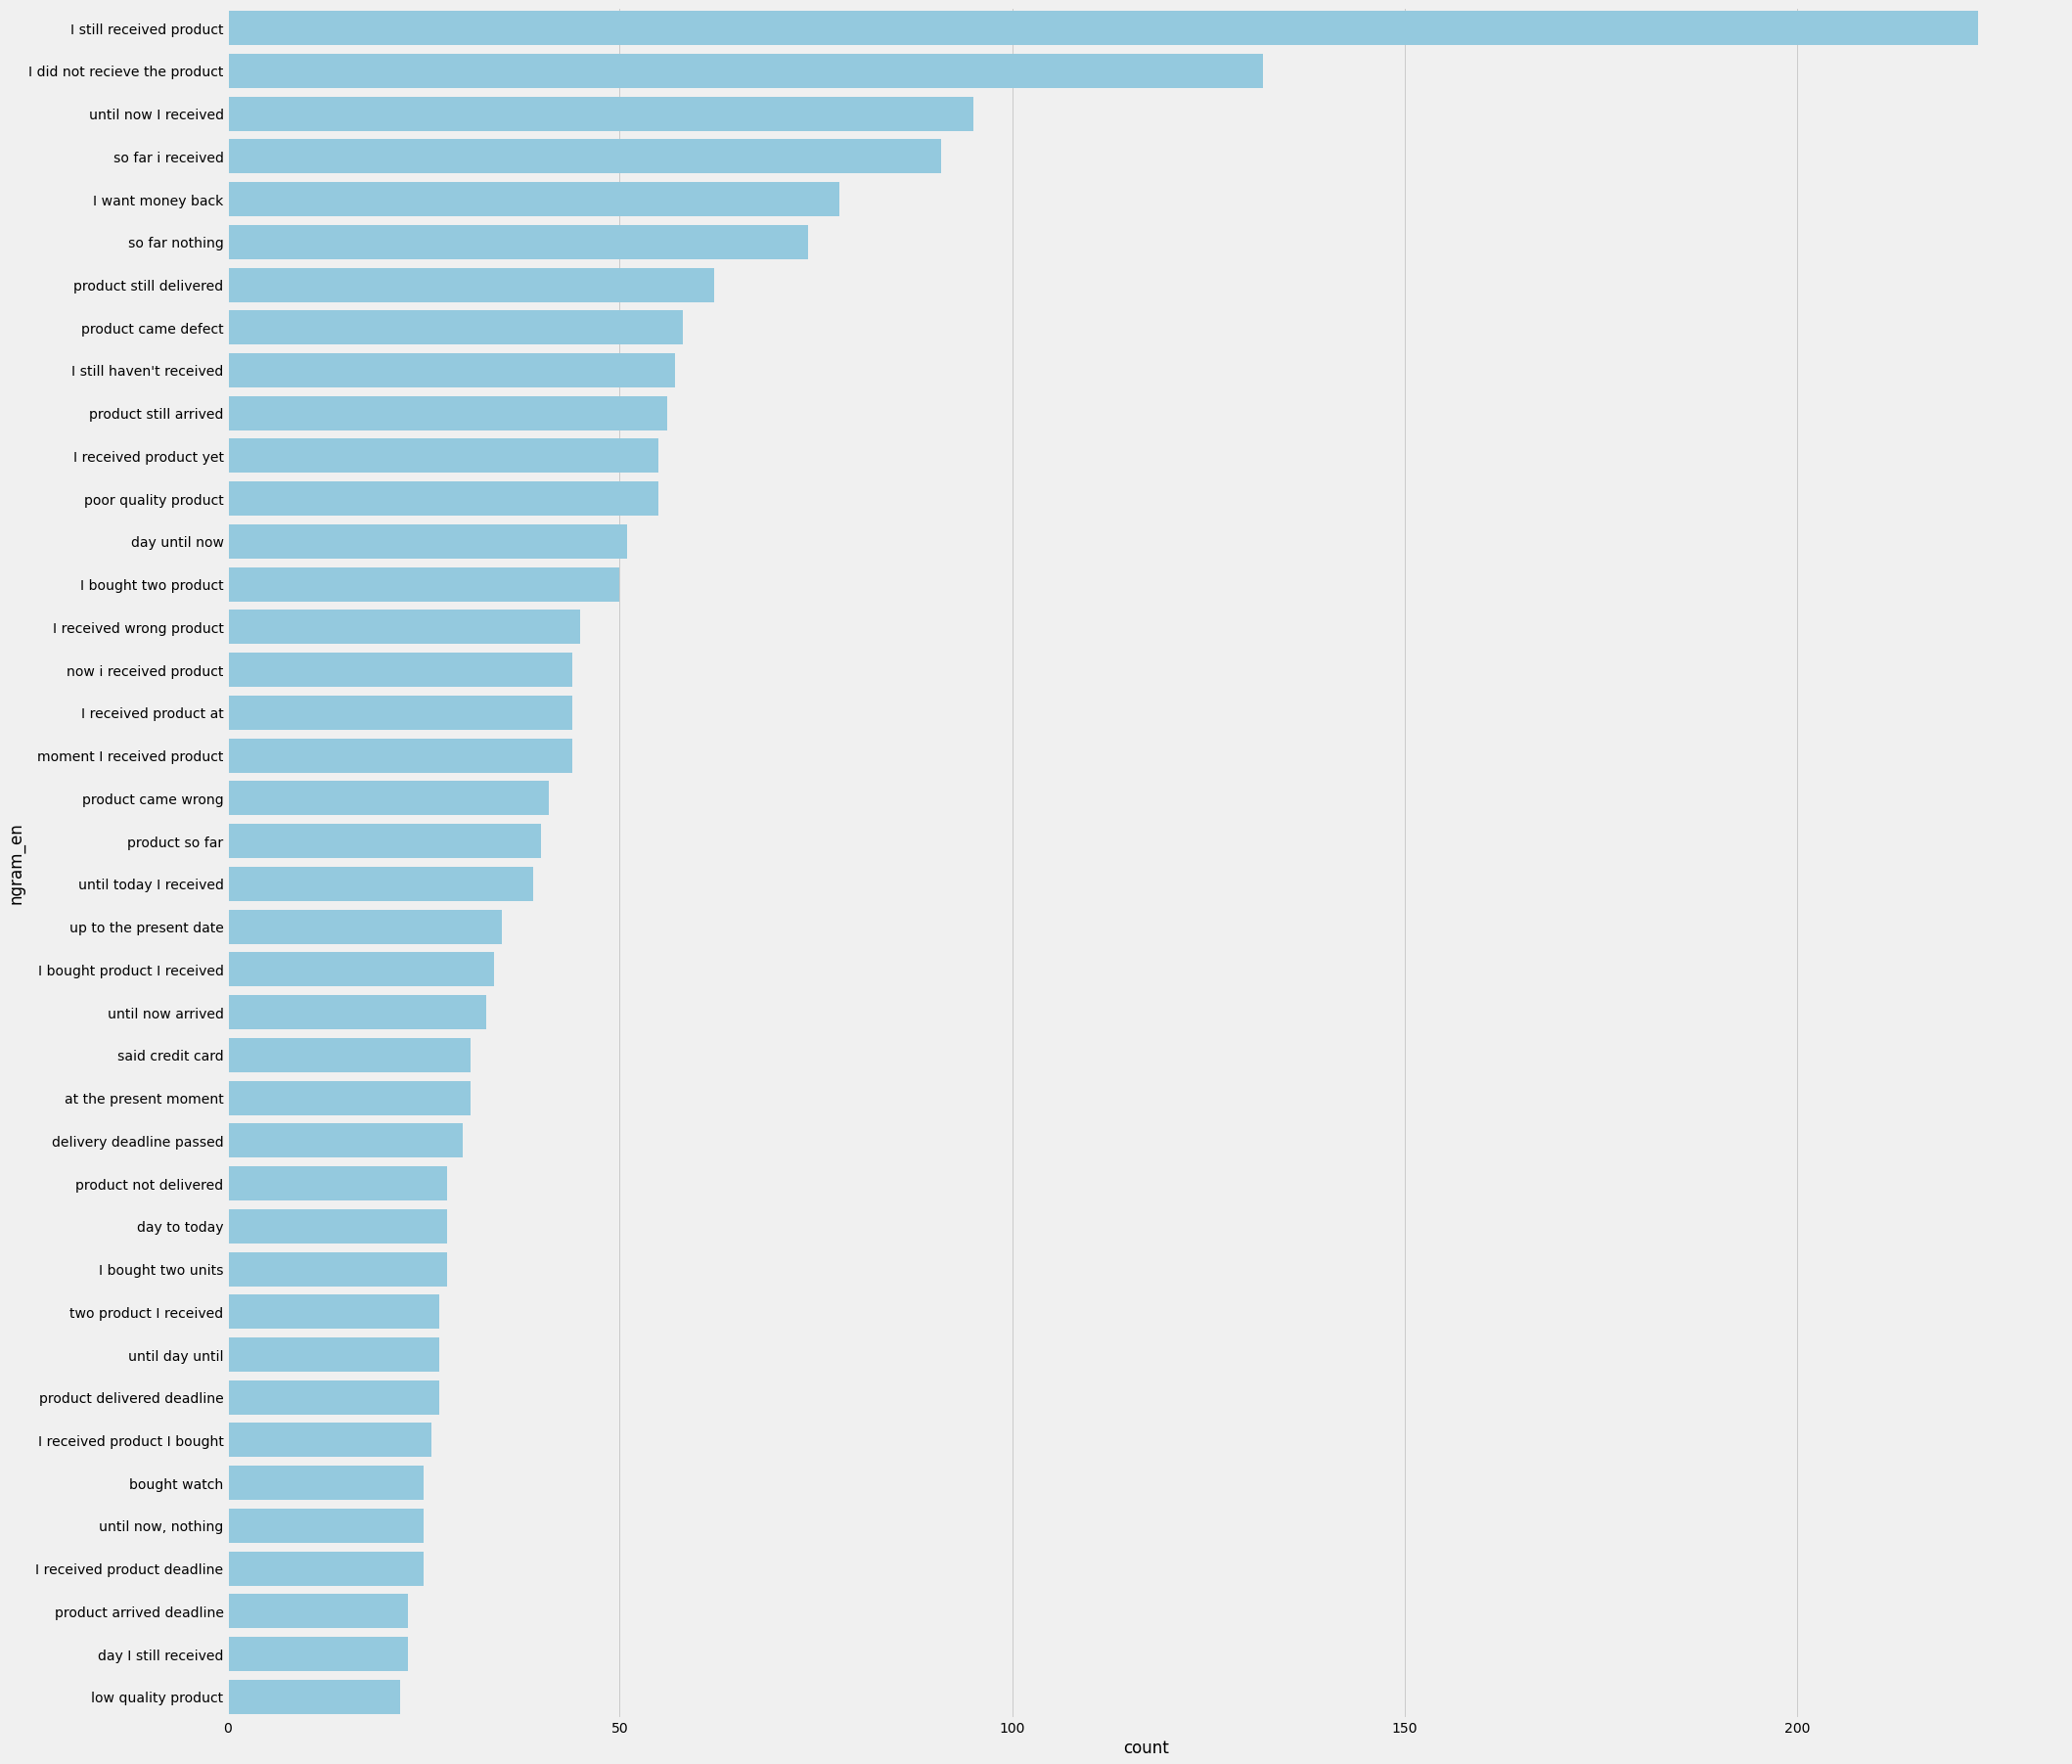

In [ ]:
plt.figure(figsize=(30, 30))
# plt.subplot(121)
sns.barplot(x="count", y="ngram_en", data=ngrams_count(df_comments[df_comments['score']<3]['clean'],(3,3),40),
            label="Total", color='skyblue')

***Hầu hết comment 1 2 sao đều nói về vđề thời gian giao hàng, chất lượng sản phẩm và giao nhầm sản phẩm***

=> *Piority of complain*


1.   Late delivery
2.   No delivery
3.   Missing delivery
4.   Poor quality product
5.   Deliver wrong product
6.   Defect cover box

#Export files

In [ ]:
!pip uninstall gspread-dataframe

Found existing installation: gspread-dataframe 3.0.8
Uninstalling gspread-dataframe-3.0.8:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gspread_dataframe-3.0.8.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gspread_dataframe.py
Proceed (y/n)? 

In [ ]:
pip install gspread-dataframe

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [ ]:
# Authorize Google Sheets API
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
# # Create a new Google Spreadsheets
##ONLY USE for first run, comment out from second run
# sh = gc.create('DS_FINAL_OLIST') #đặt tên cho bảng ở đây

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data(gsheet_key, worksheet_id, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.get_worksheet(worksheet_id)
    set_with_dataframe(worksheet, data)

In [ ]:
gsheet_key = '1GS5AuB8FfP5QywAdkp8zl8hFiGQs2tyo62HVgStQjQY'
# export_data(gsheet_key, 0, top_5_worst_trending_product)
# export_data(gsheet_key, 1, t_state_avg_price)
# export_data(gsheet_key, 2, t_state_sum_price)
# export_data(gsheet_key, 3, t_state_no_customer)
# export_data(gsheet_key, 4, df2)
